In [9]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

## Задание 1

In [4]:
with np.load('data_89.npz') as data:
    x, y = data['A2'], data['y2']
def solve():
    a0 = np.random.rand(x.shape[1]+1)
    return minimize(lambda a: ((y - 1 / (1 + np.exp(a[0] + x @ a[1:])))**2).mean(), a0)

In [5]:
solution = solve()
print(f'a: {solution.x}')
print(f'f: {solution.fun}')

a: [ 0.59163632  0.32321165 -0.11760344  2.00066796 -0.32415858 -0.28340467
 -0.36370419 -0.01761939  0.00642638  1.53148647 -0.59507638]
f: 0.0021776566599841637


## Задание 3

In [7]:
def exp_sample(n):
    y = np.random.uniform(0, 1, n)
    x = -np.log(1 - y)
    return x

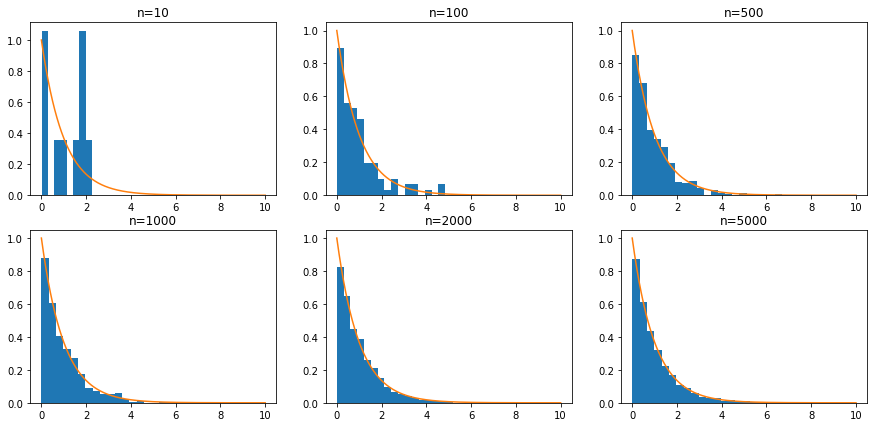

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
xx = np.linspace(0, 10, 1000)
yy = np.exp(-xx)
for i, n in enumerate([10, 100, 500, 1000, 2000, 5000]):
    x = exp_sample(n)
    axs[i // 3, i % 3].hist(x, bins=int(1 + 3.322*np.log(n)), density=True)
    axs[i // 3, i % 3].plot(xx, yy)
    axs[i // 3, i % 3].set_title(f'n={n}')

In [11]:
from scipy.stats import kstest  #проверка гипотезы (критерий согласия, уровень значимости 5 процентов)

x = exp_sample(10**8)
pvalue = kstest(x, lambda x: 1 - np.exp(-x))[1]
print(f'p-value: {pvalue}')

p-value: 0.5059392626912675


## Задание 4

In [13]:
def norm_sample(n):
    phi = np.random.uniform(0, 1, n)
    r = np.random.uniform(0, 1, n)
    x = np.sqrt(-2 * np.log(1 - r)) * np.cos(2 * np.pi * phi)
    return x

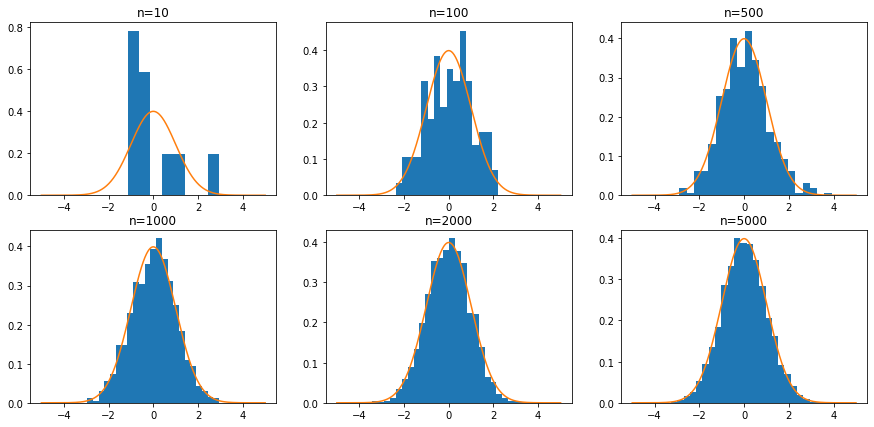

In [14]:
from scipy.stats import norm
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
xx = np.linspace(-5, 5, 1000)
yy = norm.pdf(xx)
for i, n in enumerate([10, 100, 500, 1000, 2000, 5000]):
    x = norm_sample(n)
    axs[i // 3, i % 3].hist(x, bins=int(1 + 3.322*np.log(n)), density=True)
    axs[i // 3, i % 3].plot(xx, yy)
    axs[i // 3, i % 3].set_title(f'n={n}')

In [15]:
from scipy.stats import shapiro ## проверка тестом Шапиро-Уилка

x = norm_sample(3000)
pvalue = shapiro(x)[1]
print(f'p-value: {pvalue}')

p-value: 0.8983496427536011


## Задание 5

In [16]:
with np.load('data_89.npz') as data:
    A = data['A4']

In [18]:
A == A.T

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [19]:
np.linalg.eigvals(A)

array([32.  , 16.  ,  8.  ,  4.  ,  2.  ,  0.25,  0.5 ,  1.  ])

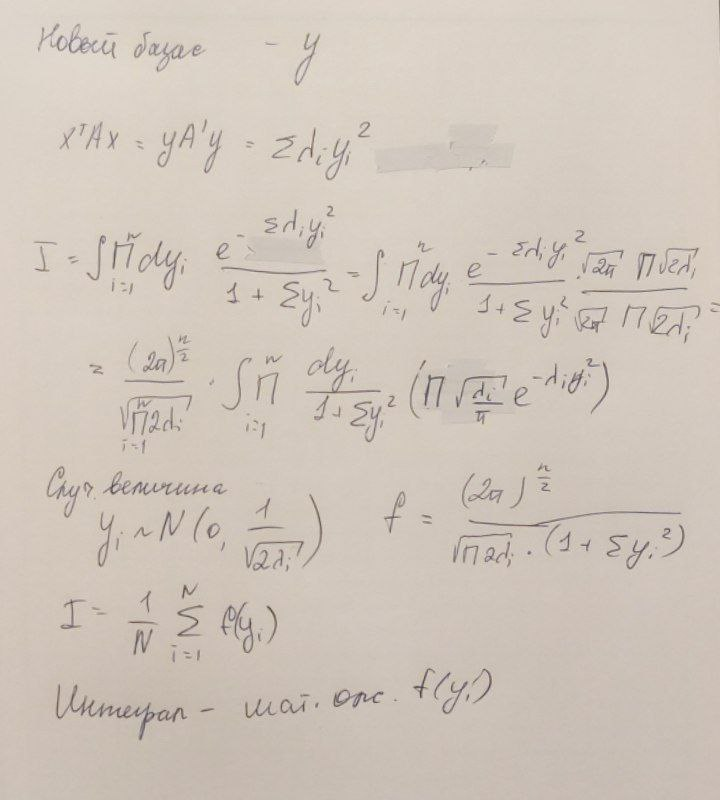

In [21]:
from IPython.display import Image
Image('p1.jpeg')

In [23]:
def integrate(n):
    vals = np.linalg.eigvals(A)
    y = np.random.normal(loc=0, scale=1/np.sqrt(2 * vals), size=(n, A.shape[0]))
    f = pow(np.sqrt(2 * np.pi), A.shape[0]) / ((1 + np.sum(y**2, axis=1)) * np.sqrt(np.prod(2 * vals)))
    return f.mean()

In [24]:
integral = integrate(10**8)
print(f'I={integral}')

I=0.4230790004535069


## Задание 6

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def Legendre_roots_weights(a, b):
  x1 = ((b-a)*(0.8611363116) + a + b) / 2
  x2 = ((b-a)*(0.3399810436) + a + b) / 2
  x3 = ((b-a)*(-0.8611363116) + a + b) / 2
  x4 = ((b-a)*(-0.3399810436) + a + b) / 2
  w1 = 0.3478548451 * (b-a)/2
  w2 = 0.6521451549 * (b-a)/2
  w3 = 0.3478548451 * (b-a)/2
  w4 = 0.6521451549 * (b-a)/2
  return np.array((x1, x2, x3, x4)), np.array((w1, w2,w3, w4))

In [27]:
Y, W = Legendre_roots_weights(0, 1)

def k(x, t):
  return np.sqrt(x * t)

M = np.empty((4, 4))
for i in range(4):
  for j in range(4):
    M[i][j] = W[j] * k(Y[i], Y[j])

M *= (-1)
M = M + np.eye(4)

In [28]:
def f(x):
  return 5 * np.sqrt(x)

ff = np.empty(4)
for i in range(4):
  ff[i] = f(Y[i])

In [29]:
phi = np.linalg.solve(M, ff)

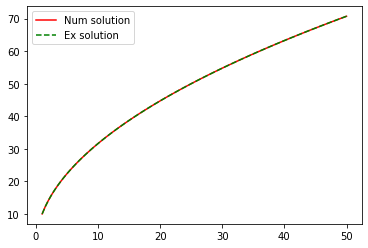

In [30]:
x = np.linspace(1, 50, 100)
phi_x = np.array([np.sum(np.array([W[i] * phi[i] * k(Y[i], j) for i in range(4)])) + f(j) for j in x])
phi_x_exact = np.array([10 * np.sqrt(i) for i in x])

plt.plot(x, phi_x, 'r', label='Num solution')
plt.plot(x,  phi_x_exact, 'g--', label='Ex solution')
plt.legend()